In [1]:
#importing all required library's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#importing the csv file to local machine for analysis
lendingClubDF = pd.read_csv(r'loan.csv', low_memory=False)

### DATA CLEANING & MANIPULATION STARTS FROM HERE
## DATA CLEANING

# check for unique rows. Are there or any duplicates?
print("No. of unique rows:", lendingClubDF.duplicated(subset=None, keep='first').count())


#Check any rows, columns are empty 
print("No. of empty rows: ", lendingClubDF.isnull().all(axis=1).sum()) # 0 Rows that are empty
print("No. of empty columns: ", lendingClubDF.isnull().all(axis=0).sum()) # 54 Columns that are empty


No. of unique rows: 39717
No. of empty rows:  0
No. of empty columns:  54


In [2]:
## Handling Missing Values - 
# 54 columns having missing values can be dropped
lendingClubDF.dropna(axis = 1, how = 'all', inplace = True)

print("No. of rows * columns after dropping missing value columns: ", lendingClubDF.shape) #gives 57 colums after dropping 54 columns with same no of rows, i.e., 39717


No. of rows * columns after dropping missing value columns:  (39717, 57)


In [3]:
#columns with single value
uniqueColumns = lendingClubDF.nunique()
colSingleValue = uniqueColumns[uniqueColumns.values == 1]
#print(colSingleValue.index) #Uncomment to see the columns having single value

#drop above columns with singe value as they won't impact
lendingClubDF.drop(columns = list(colSingleValue.index), inplace=True)
print("No. of rows * columns after dropping single value columns: ", lendingClubDF.shape) #Gives 48 columns

No. of rows * columns after dropping single value columns:  (39717, 48)


In [4]:

## Company needs information of risky applicants. Therefore, the fields that are created post approval are not required for analysis. 
## Such columns can be removed which were created post approval by adding to a list

# Other fields like columns such as  "member_id", "url", etc are different for each application, but still doesn't make sense for analysis. 
# Dropping all below mentioned columns which won't contribute to analysis

#dropping unwanted columns before analysis
del_cols = ["delinq_2yrs", "revol_bal","out_prncp","total_rec_prncp","total_rec_int","total_rec_late_fee",
           "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d",
           "mths_since_last_delinq", "mths_since_last_record",
           "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc"]
lendingClubDF.drop(columns=del_cols, inplace=True)
print("No. of rows * columns after dropping unused/unwanted columns: ", lendingClubDF.shape) #Gives 26 columns, with 39717 rows

# At this point, we have now reduced from 111 to 26 columns (non null values) still retaining 39717 rows


No. of rows * columns after dropping unused/unwanted columns:  (39717, 27)


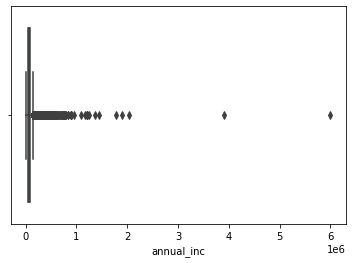

In [5]:
# Outlier Treatment - Annual_inc

sns.boxplot(lendingClubDF['annual_inc'])
plt.show()



In [6]:

quantile_info = lendingClubDF.annual_inc.quantile([0.5, 0.6, 0.7,0.8, 0.9, 0.95,0.96,0.97,0.98, 0.99])
print("Before Outliers: ", quantile_info) 

# Outliers needs to be removed for the quantile 0.99, considering other values are still acceptable

per99_annualInc = lendingClubDF['annual_inc'].quantile(0.99)
lendingClubDF = lendingClubDF[lendingClubDF.annual_inc <= per99_annualInc]

quantile_info = lendingClubDF.annual_inc.quantile([0.5, 0.6, 0.7,0.8, 0.9, 0.95,0.96,0.97,0.98, 0.99])
print("After  Outliers: ", quantile_info) 

Before Outliers:  0.50     59000.00
0.60     65844.40
0.70     75600.00
0.80     90000.00
0.90    116000.00
0.95    142000.00
0.96    150000.00
0.97    165757.92
0.98    187000.00
0.99    234999.36
Name: annual_inc, dtype: float64
After  Outliers:  0.50     58000.00
0.60     65000.00
0.70     75000.00
0.80     90000.00
0.90    112000.00
0.95    135000.00
0.96    142640.00
0.97    150000.00
0.98    166339.04
0.99    189000.00
Name: annual_inc, dtype: float64


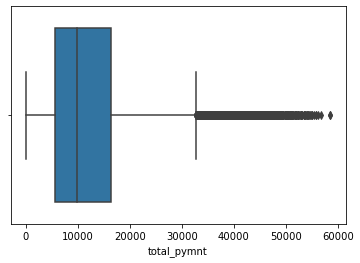

In [7]:
# Outlier Treatment - total_pymnt
 
sns.boxplot(lendingClubDF['total_pymnt'])
plt.show()


In [8]:
quantile_info = lendingClubDF.total_pymnt.quantile([0.5, 0.6, 0.7,0.8, 0.9, 0.95,0.96,0.97,0.98, 0.99])
print("Before Outliers: ", quantile_info)

per99_total_pymnt = lendingClubDF['total_pymnt'].quantile(0.99)
lendingClubDF = lendingClubDF[lendingClubDF.total_pymnt <= per99_total_pymnt]

quantile_info = lendingClubDF.total_pymnt.quantile([0.5, 0.6, 0.7,0.8, 0.9, 0.95,0.96,0.97,0.98, 0.99])
print("After  Outliers: ", quantile_info) 

Before Outliers:  0.50     9830.255586
0.60    11922.237448
0.70    14611.301382
0.80    18209.845396
0.90    24538.997312
0.95    29971.181090
0.96    31361.472304
0.97    33471.089318
0.98    36589.764154
0.99    41828.348798
Name: total_pymnt, dtype: float64
After  Outliers:  0.50     9719.311189
0.60    11787.952788
0.70    14393.020098
0.80    17903.633720
0.90    23856.420186
0.95    28923.847174
0.96    30022.264764
0.97    31412.097594
0.98    33496.362306
0.99    36608.300584
Name: total_pymnt, dtype: float64


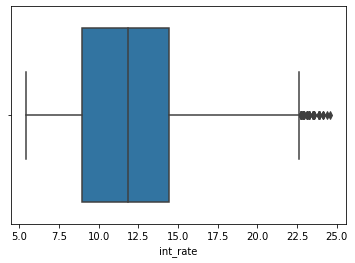

In [9]:
# Outlier Treatment - int_rate --- Should see whether to retain this
lendingClubDF['term'] = lendingClubDF.term.str.strip() #remove the starting empty space


# 'int_rate' and 'revol_util' has %. Remove % and convert to float
lendingClubDF['int_rate'] = lendingClubDF.int_rate.str.strip('%').astype(float)
lendingClubDF['revol_util'] = lendingClubDF.revol_util.str.strip('%').astype(float)

sns.boxplot(lendingClubDF['int_rate'])
plt.show()



In [10]:
#quantile_info = lendingClubDF.int_rate.quantile([0.5, 0.6, 0.7,0.8, 0.9, 0.95,0.96,0.97,0.98, 0.99])
#print("Before Outliers: ", quantile_info)

#per99_int_rate = lendingClubDF['int_rate'].quantile(0.99)
#lendingClubDF = lendingClubDF[lendingClubDF.total_pymnt <= per99_int_rate]

#quantile_info = lendingClubDF.int_rate.quantile([0.5, 0.6, 0.7,0.8, 0.9, 0.95,0.96,0.97,0.98, 0.99])
#print("After  Outliers: ", quantile_info) 

In [11]:
##DATA MANIPULATION 

# Derive Metrics for Analysis
# We'll derive issue month and year from existing column 'issue_d' before converting it's data type

df_month_year = lendingClubDF['issue_d'].str.partition("-", True)     
lendingClubDF['issue_month']=df_month_year[0]                       
lendingClubDF['issue_year']='20' + df_month_year[2]

print(lendingClubDF.term.unique())

['36 months' '60 months']


In [12]:


# 'issue_d', 'earliest_cr_line' are having date values, but Dtype is object. We'll Convert datatype to date.
lendingClubDF['issue_d'] = pd.to_datetime(lendingClubDF.issue_d, format='%b-%y')
lendingClubDF['earliest_cr_line'] = pd.to_datetime(lendingClubDF.earliest_cr_line,format='%b-%y')

# emp_length has '+' which definitely needs to be removed for analysis. Here, we assume < 1 as 0 and >10 as 10
lendingClubDF.emp_length.fillna('0',inplace=True)
lendingClubDF['emp_length']=lendingClubDF.emp_length.str.extract('(\d+)')


#convert the amount columns to numeric, so that, it'll be useful for analysis
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length']
lendingClubDF[cols1] = lendingClubDF[cols1].apply(pd.to_numeric)


In [13]:
## ROW wise Data Cleaning -

#The goal is to find who is likely to default and this can only be said in case of either fully paid or charged off loans.
#We'll remove all the data where status is 'Current'
#lendingClubDF = lendingClubDF[lendingClubDF.loan_status != "Current"]

#print("No. of rows * columns after cleaning Rows: ", lendingClubDF.shape)

In [14]:

# At this point, we have done -
#1) Cleaning of Column Data from 111 columns to 25 
#2) Cleaning of Row Data from 39717 rows to 38193
#3) Outlier Treatment
#4) Added 2 Derived columns
#4) Standardizing data - Removing Empty Space, % symbol, Converting to correct data types

### DATA CLEANING & MANIPULATION ENDS HERE

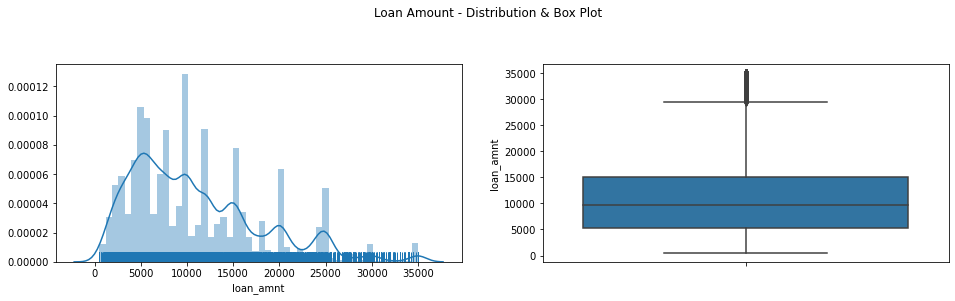

In [15]:
### UNIVARIATE ANALYSIS 
# Quantitative Variable - loan_amnt

plt.figure(figsize=(16,8))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(lendingClubDF['loan_amnt'],rug = True)
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=lendingClubDF['loan_amnt'])

plt.suptitle('Loan Amount - Distribution & Box Plot')
plt.show()

In [16]:
lendingClubDF.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38925.000000
mean     10906.440591
std       7052.211766
min        500.000000
5%        2400.000000
10%       3110.000000
25%       5325.000000
50%       9650.000000
75%      15000.000000
90%      21000.000000
95%      25000.000000
99%      32190.000000
max      35000.000000
Name: loan_amnt, dtype: float64

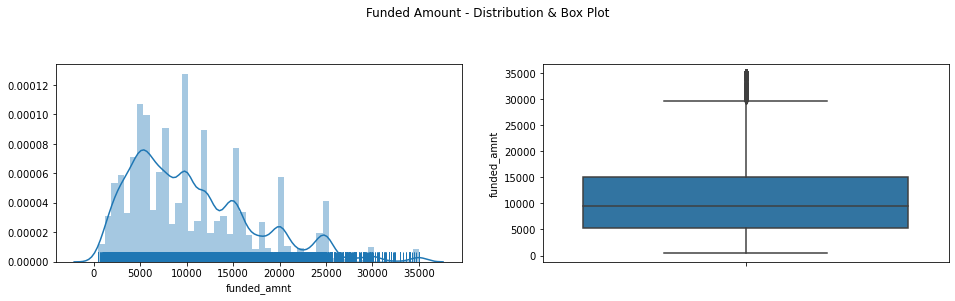

In [17]:
### UNIVARIATE ANALYSIS
# Quantitative Variable- funded_amnt
plt.figure(figsize=(16,8))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(lendingClubDF['funded_amnt'],rug = True)
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=lendingClubDF['funded_amnt'])

plt.suptitle('Funded Amount - Distribution & Box Plot')
plt.show()

In [18]:
lendingClubDF.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38925.000000
mean     10636.102762
std       6761.669515
min        500.000000
5%        2400.000000
10%       3050.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      30000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

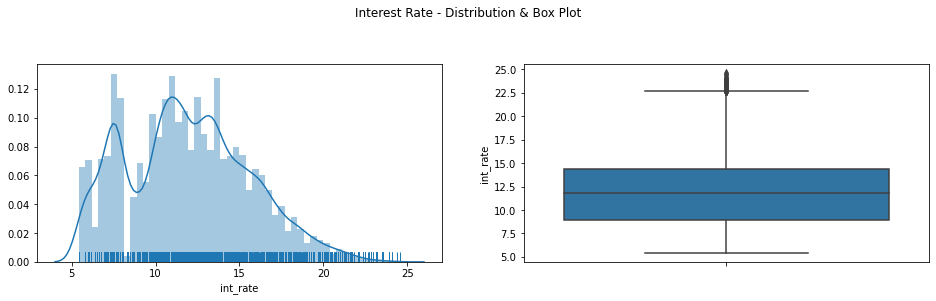

In [19]:
### UNIVARIATE ANALYSIS
# Quantitative Variable- int_rate
plt.figure(figsize=(16,8))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(lendingClubDF['int_rate'],rug = True)
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=lendingClubDF['int_rate'])

plt.suptitle('Interest Rate - Distribution & Box Plot')
plt.show()

In [20]:
lendingClubDF.int_rate.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38925.000000
mean        11.951189
std          3.681347
min          5.420000
5%           6.170000
10%          7.140000
25%          8.940000
50%         11.830000
75%         14.420000
90%         16.820000
95%         18.300000
99%         20.890000
max         24.590000
Name: int_rate, dtype: float64

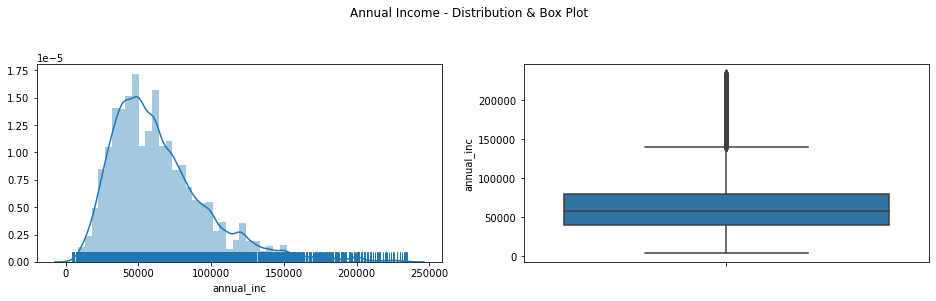

In [21]:
### UNIVARIATE ANALYSIS 
# Quantitative Variable - annual_inc
plt.figure(figsize=(16,8))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(lendingClubDF['annual_inc'],rug = True)
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=lendingClubDF['annual_inc'])

plt.suptitle('Annual Income - Distribution & Box Plot')
plt.show()

In [22]:
lendingClubDF.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count     38925.000000
mean      65056.442292
std       34856.434703
min        4000.000000
5%        24000.000000
10%       30000.000000
25%       40000.000000
50%       58000.000000
75%       80000.000000
90%      110000.000000
95%      132745.076000
99%      185003.040000
max      234996.000000
Name: annual_inc, dtype: float64

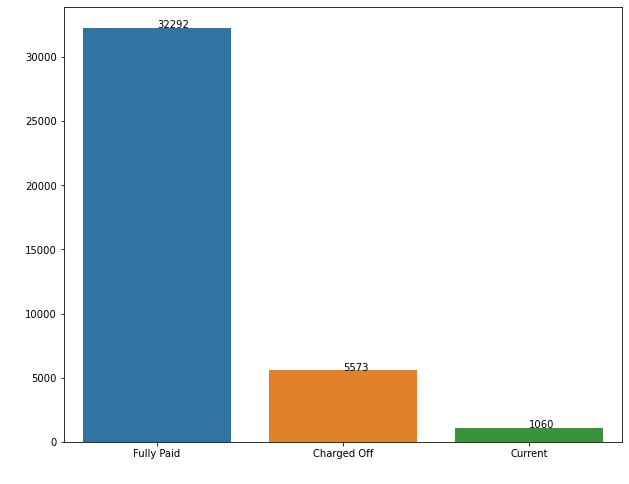

In [23]:
### UNIVARIATE ANALYSIS 
# Unordered Categorical Variables - Loan Status
plt.figure(figsize=(10,8))

ax = sns.countplot(x="loan_status",data=lendingClubDF)
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=lendingClubDF['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')


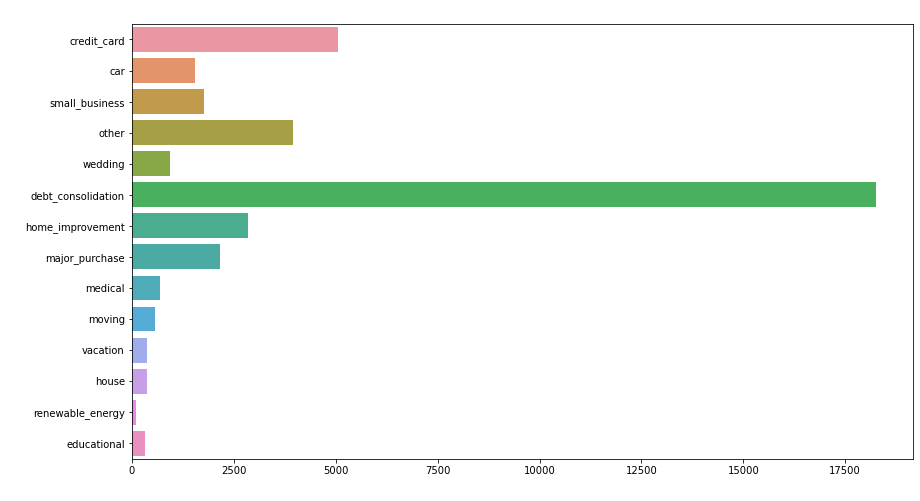

In [24]:
### UNIVARIATE ANALYSIS 
# Unordered Categorical Variables - Purpose
plt.figure(figsize=(14,8))
ax = sns.countplot(y="purpose",data=lendingClubDF)# taking purpose on y axis for better readability
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()


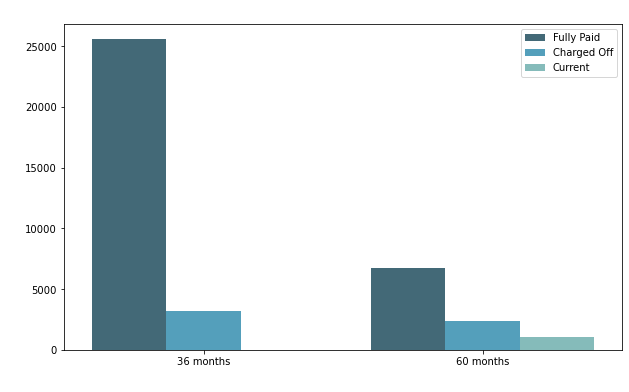

In [25]:
### UNIVARIATE ANALYSIS 
# Ordered Categorical Variables - Term
plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=lendingClubDF,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


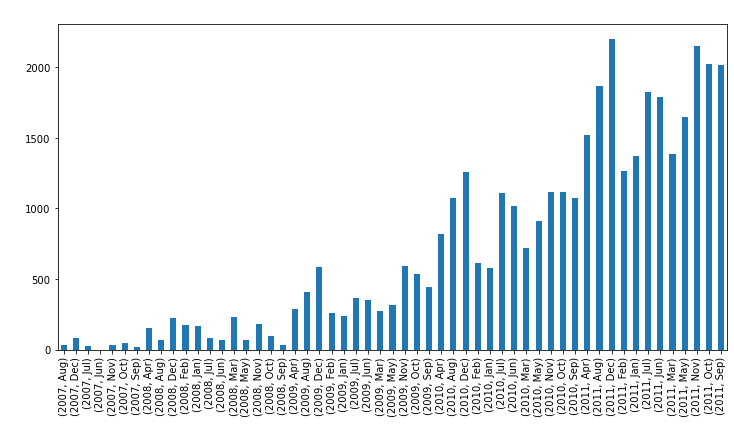

In [26]:
### UNIVARIATE ANALYSIS 
#Ordered Categorical Variable from the Derived Columns - issue_month and issue_year 
plt.figure(figsize=(12,6))
lendingClubDF.groupby(['issue_year','issue_month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.xticks(fontsize = 10, rotation=90) # rotating x axis ticks for better readability
plt.show()


Text(0.5, 1.0, 'Terms vs Loan Amount')

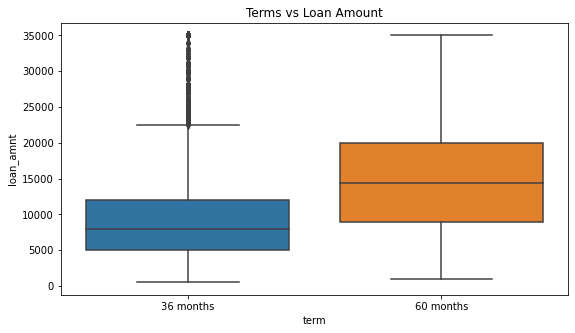

In [27]:
#SEGMENTED UNIVARIATE ANALYSIS - term
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=lendingClubDF.loan_amnt, data=lendingClubDF)
plt.title('Terms vs Loan Amount') 

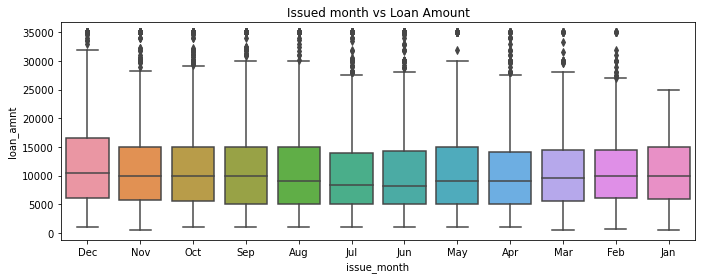

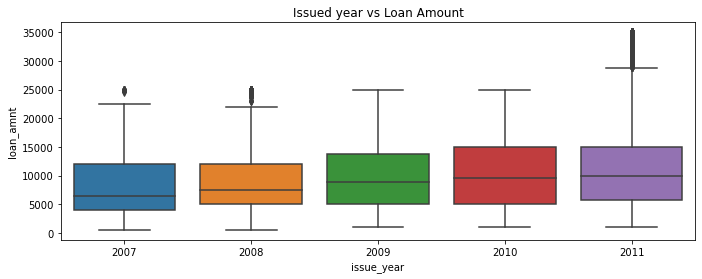

In [28]:
#SEGMENTED UNIVARIATE ANALYSIS on derived columns - month and year

#Issue_d
plt.figure(figsize=(25,4))
plt.subplot(121)
sns.boxplot(x=lendingClubDF.issue_month, y=lendingClubDF.loan_amnt, data=lendingClubDF)
plt.title('Issued month vs Loan Amount')
plt.figure(figsize=(25,4))
plt.subplot(122)
sns.boxplot(x=lendingClubDF.issue_year, y=lendingClubDF.loan_amnt, data=lendingClubDF)
plt.title('Issued year vs Loan Amount')
plt.show()



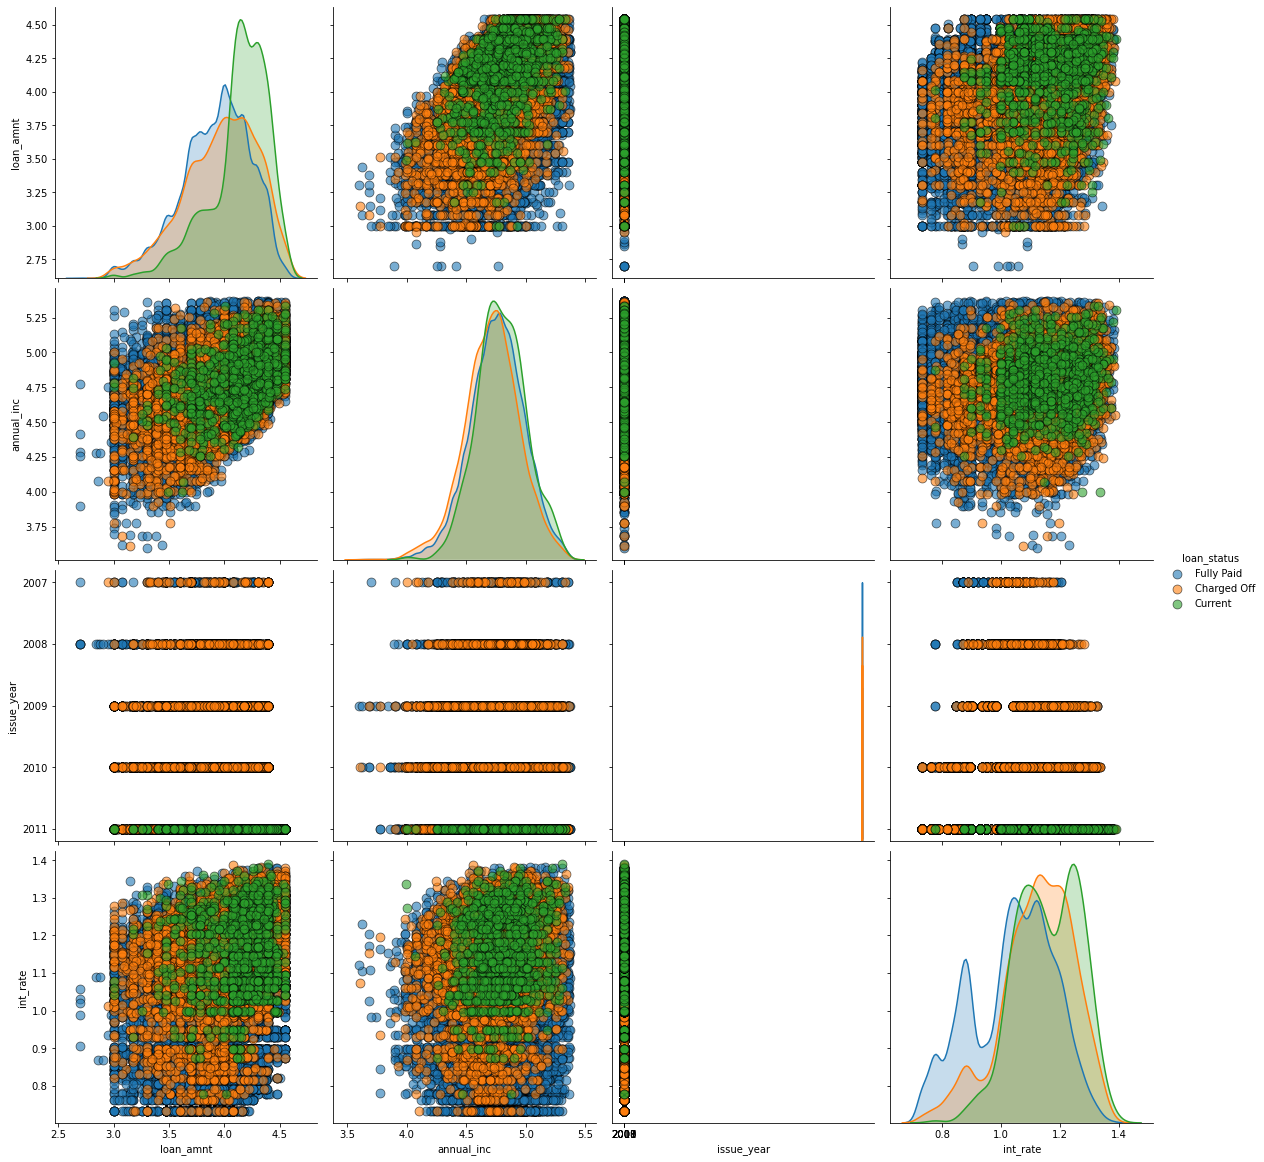

In [29]:
### Multivariate Analysis - Pair Plots
loan_pair = lendingClubDF[['loan_amnt', 'annual_inc', 'issue_year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

In [30]:
##At this point, We have done -

# UNIVARIATE ANALYSIS on 
# a) Quantitative Variables - loan_amnt, funded_amnt,int_rate & annual_inc
# b) Unordered Categorical Variables - loan_status & purpose
# c) Ordered Categorical Variables - Term
# d) Ordered Categorical Variable from Derived Columns - issue_month and issue_year

# SEGMENTED UNIVARIATE ANALYSIS 
# a) term
# b) Derived columns - month and year


# MULTIVARIATE ANALYSIS - loan_amnt, annual_inc, int_rate


# Bivariate Analysis

In [31]:
# Derived columns
# Loan amount categorization
lendingClubDF['loan_amnt_category'] = pd.cut(lendingClubDF['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000 +'])

# Interest rate categorization
lendingClubDF['int_rate_category'] = pd.cut(lendingClubDF['int_rate'], [0, 10, 12,14, 16,18,20], labels=['0-10', '10-12', '12-14','14-16','16-18','18+'])


# Annual income categorization
lendingClubDF['annual_inc_category'] = pd.cut(lendingClubDF['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])



In [32]:
lendingClubDF.loan_status.value_counts()

Fully Paid     32292
Charged Off     5573
Current         1060
Name: loan_status, dtype: int64

In [33]:
loan_amt_and_pymt = lendingClubDF.groupby(['loan_amnt_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loan_amt_and_pymt['Total'] = loan_amt_and_pymt['Charged Off'] +  loan_amt_and_pymt['Current'] +  loan_amt_and_pymt['Fully Paid'] 
loan_amt_and_pymt['Chargedoff_Proportion'] = (loan_amt_and_pymt['Charged Off'] / loan_amt_and_pymt['Total'])*100
loan_amt_and_pymt.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,loan_amnt_category,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,30000 +,162,33,250,445,36.404494
5,25000-30000,141,73,462,676,20.857988
4,20000-25000,530,161,2223,2914,18.188058
3,15000-20000,743,239,3550,4532,16.394528
0,0-5000,1310,96,8126,9532,13.743181
2,10000-15000,1050,300,6580,7930,13.240858
1,5000-10000,1637,158,11101,12896,12.693859


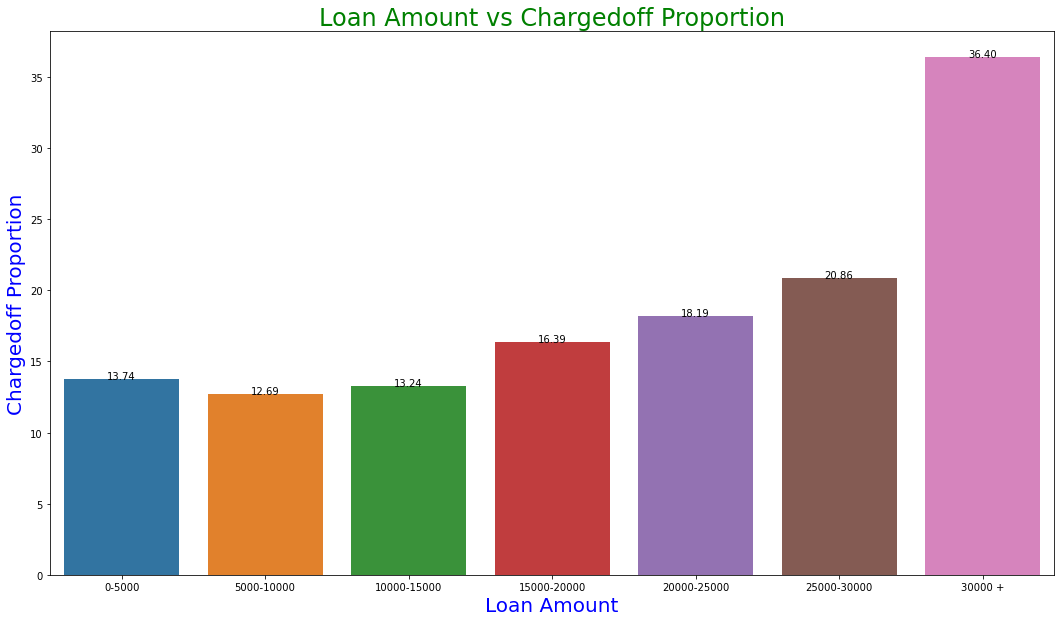

In [34]:

fig, ax = plt.subplots(figsize=(18, 10))
ax.set_title('Loan Amount vs Chargedoff Proportion',fontsize=24,color = 'g')
ax=sns.barplot(x='loan_amnt_category', y='Chargedoff_Proportion', data=loan_amt_and_pymt)
ax.set_ylabel('Chargedoff Proportion',fontsize=20,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=20,color='b')
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


show_values_on_bars(ax)
plt.show()

In [35]:
interest_and_pymt = lendingClubDF.groupby(['int_rate_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_and_pymt['Total'] = interest_and_pymt['Charged Off'] +  interest_and_pymt['Fully Paid'] +  interest_and_pymt['Current'] 
interest_and_pymt['Chargedoff_Proportion'] = (interest_and_pymt['Charged Off'] / interest_and_pymt['Total'])*100
interest_and_pymt.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_category,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
5,18+,435,147,936,1518,28.656126
4,16-18,809,184,2231,3224,25.093052
3,14-16,1001,157,4146,5304,18.872549
2,12-14,1159,193,5989,7341,15.788040
1,10-12,1059,227,7200,8486,12.479378
0,0-10,825,77,11403,12305,6.704592


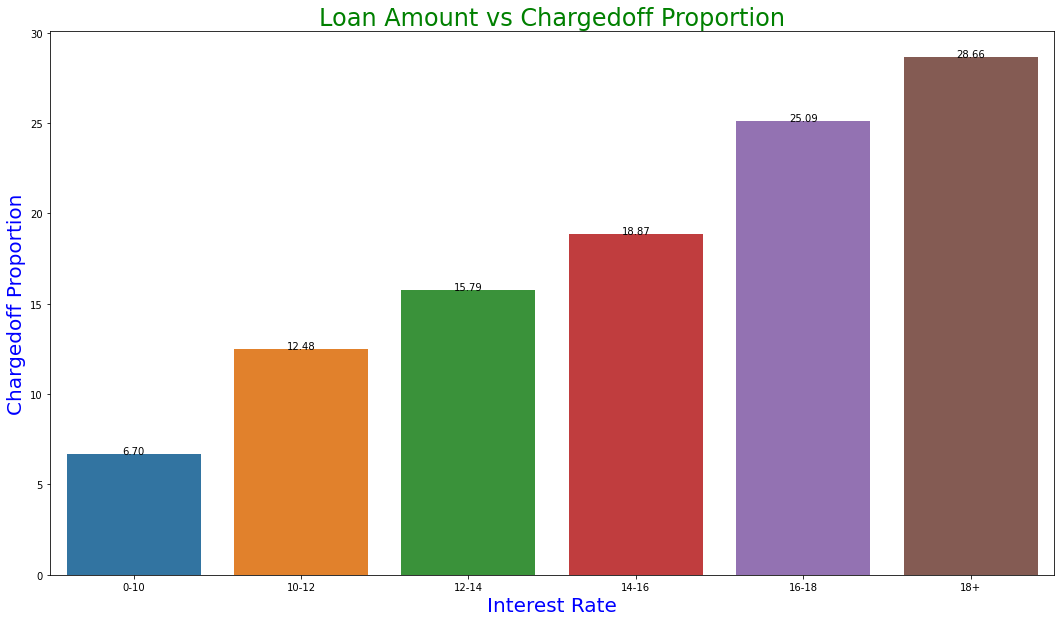

In [36]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_title('Loan Amount vs Chargedoff Proportion',fontsize=24,color = 'g')
ax=sns.barplot(x='int_rate_category', y='Chargedoff_Proportion', data=interest_and_pymt)
ax.set_ylabel('Chargedoff Proportion',fontsize=20,color = 'b')
ax.set_xlabel('Interest Rate',fontsize=20,color='b')
show_values_on_bars(ax)
plt.show()

In [37]:
annualincome_and_pymt = lendingClubDF.groupby(['annual_inc_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annualincome_and_pymt['Total'] = annualincome_and_pymt['Charged Off'] +  annualincome_and_pymt['Fully Paid'] +  annualincome_and_pymt['Current'] 
annualincome_and_pymt['Chargedoff_Proportion'] = (annualincome_and_pymt['Charged Off'] / annualincome_and_pymt['Total'])*100
annualincome_and_pymt.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_category,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,19.932717
1,20000-40000,1514,169,7004,8687,17.428341
2,40000-60000,1729,344,9522,11595,14.911600
3,60000-80000,1021,221,6534,7776,13.130144
4,80000 +,1072,317,8289,9678,11.076669


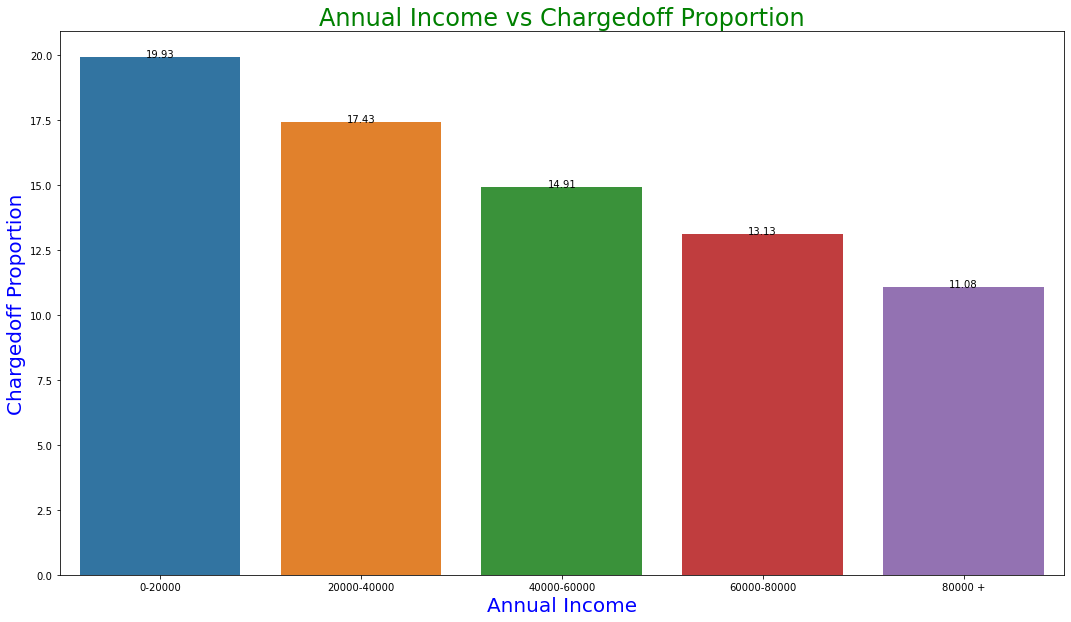

In [38]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_title('Annual Income vs Chargedoff Proportion',fontsize=24,color = 'g')
ax=sns.barplot(x='annual_inc_category', y='Chargedoff_Proportion', data=annualincome_and_pymt)
ax.set_ylabel('Chargedoff Proportion',fontsize=20,color = 'b')
ax.set_xlabel('Annual Income',fontsize=20,color='b')
show_values_on_bars(ax)
plt.show()

In [39]:
purpose_and_pymt = lendingClubDF.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_and_pymt['Total'] = purpose_and_pymt['Charged Off'] +  purpose_and_pymt['Fully Paid'] +  purpose_and_pymt['Current'] 
purpose_and_pymt['Chargedoff_Proportion'] = (purpose_and_pymt['Charged Off'] / purpose_and_pymt['Total'])*100
purpose_and_pymt.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,472.0,70.0,1234.0,1776.0,26.576577
10,renewable_energy,19.0,1.0,81.0,101.0,18.811881
3,educational,55.0,0.0,268.0,323.0,17.027864
9,other,629.0,124.0,3188.0,3941.0,15.960416
8,moving,91.0,7.0,478.0,576.0,15.798611
5,house,58.0,13.0,297.0,368.0,15.760870
7,medical,106.0,12.0,568.0,686.0,15.451895
2,debt_consolidation,2743.0,541.0,14969.0,18253.0,15.027667
12,vacation,53.0,6.0,322.0,381.0,13.910761
4,home_improvement,337.0,88.0,2417.0,2842.0,11.857847


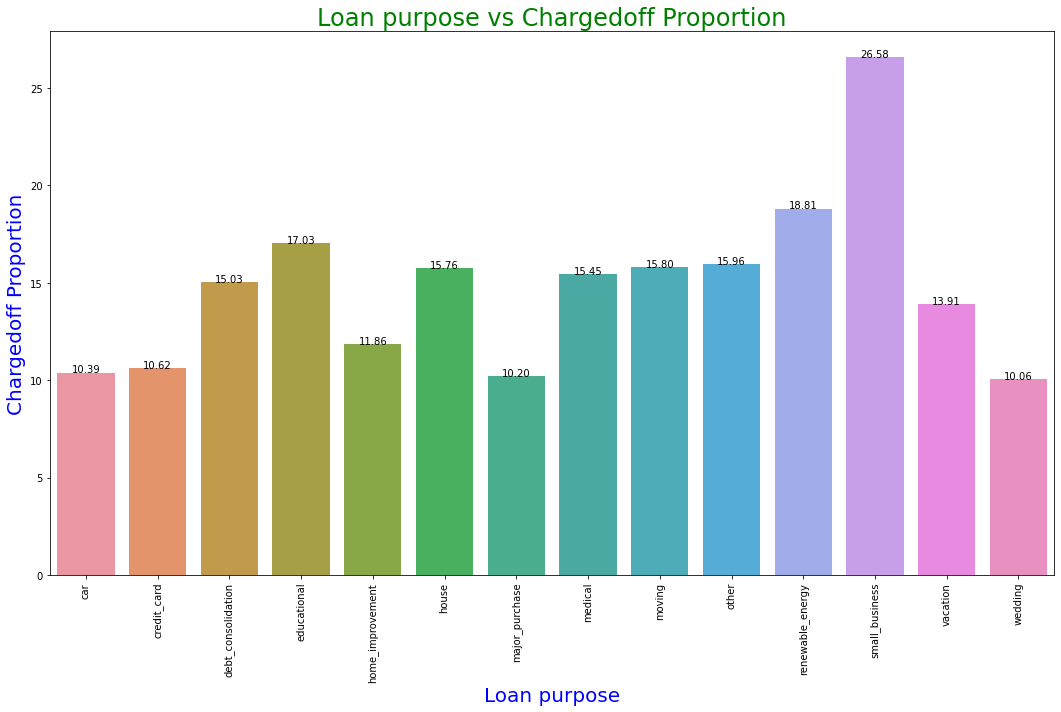

In [40]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_title('Loan purpose vs Chargedoff Proportion',fontsize=24,color = 'g')
ax=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_and_pymt)
ax.set_ylabel('Chargedoff Proportion',fontsize=20,color = 'b')
ax.set_xlabel('Loan purpose',fontsize=20,color='b')
show_values_on_bars(ax)
plt.xticks(rotation=90)
plt.show()

In [41]:
verify_and_pymt = lendingClubDF.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verify_and_pymt['Total'] = verify_and_pymt['Charged Off'] +  verify_and_pymt['Fully Paid']  +  verify_and_pymt['Current'] 
verify_and_pymt['Chargedoff_Proportion'] = (verify_and_pymt['Charged Off'] / verify_and_pymt['Total'])*100
verify_and_pymt.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2023,535,9727,12285,16.467236
1,Source Verified,1420,298,8094,9812,14.472075
0,Not Verified,2130,227,14471,16828,12.657476


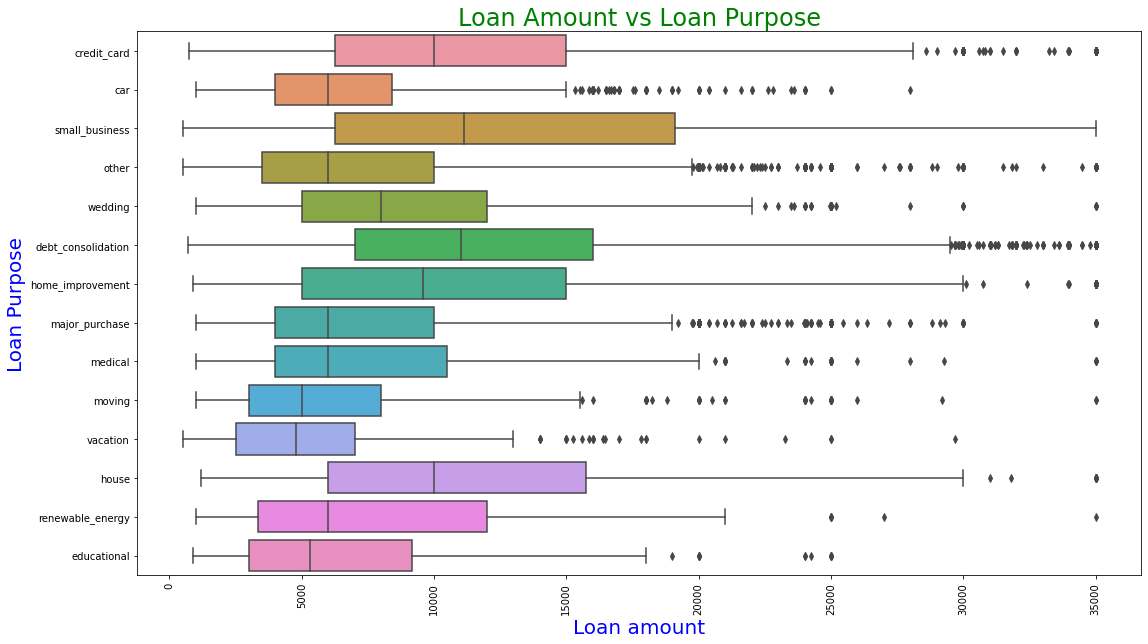

In [42]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_title('Loan Amount vs Loan Purpose',fontsize=24,color = 'g')
ax=sns.boxplot(x='loan_amnt', y='purpose', data=lendingClubDF)
ax.set_ylabel('Loan Purpose',fontsize=20,color = 'b')
ax.set_xlabel('Loan amount',fontsize=20,color='b')
plt.xticks(rotation=90)
plt.show()

In [43]:
lendingClubDF.issue_d = pd.to_datetime(lendingClubDF.issue_d, format='%b-%y')
lendingClubDF['year']=lendingClubDF['issue_d'].dt.year


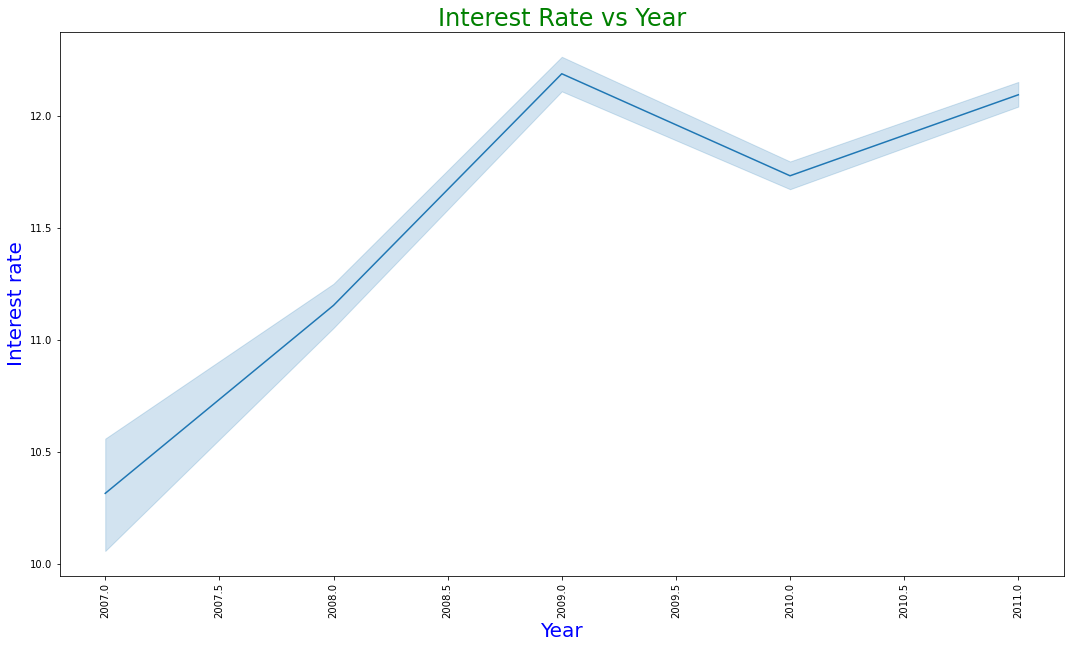

In [44]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_title('Interest Rate vs Year',fontsize=24,color = 'g')
ax=sns.lineplot(x='year', y='int_rate', data=lendingClubDF)
ax.set_ylabel('Interest rate',fontsize=20,color = 'b')
ax.set_xlabel('Year',fontsize=20,color='b')
plt.xticks(rotation=90)
plt.show()

In [ ]:
### CORRELATIONS

In [ ]:
features1=list(['loan_amnt','funded_amnt','installment','int_rate','funded_amnt','total_pymnt'])
loan_correlation = lendingClubDF[features1].corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="Blues")
plt.show()